In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

## Dataset: CDC Diabetes Health Indicators

In [35]:
from ucimlrepo import fetch_ucirepo

cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

df = pd.concat([X, y], axis=1)

## Variables Description

In [9]:
with pd.option_context("display.max_colwidth", None):
    display(
        cdc_diabetes_health_indicators.variables.drop(
            columns=["demographic", "units"]
        )
    )

,name,role,type,description,missing_values
0,ID,ID,Integer,Patient ID,no
1,Diabetes_binary,Target,Binary,0 = no diabetes 1 = prediabetes or diabetes,no
2,HighBP,Feature,Binary,0 = no high BP 1 = high BP,no
3,HighChol,Feature,Binary,0 = no high cholesterol 1 = high cholesterol,no
4,CholCheck,Feature,Binary,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years,no
5,BMI,Feature,Integer,Body Mass Index,no
6,Smoker,Feature,Binary,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes,no
7,Stroke,Feature,Binary,(Ever told) you had a stroke. 0 = no 1 = yes,no
8,HeartDiseaseorAttack,Feature,Binary,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes,no
9,PhysActivity,Feature,Binary,physical activity in past 30 days - not including job 0 = no 1 = yes,no


## Features exploration

In [31]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [42]:
np.random.seed(RANDOM_STATE)
random_features = np.random.choice(X.columns, size=5, replace=False)
random_features

array(['HighBP', 'Sex', 'PhysHlth', 'HighChol', 'Fruits'], dtype=object)

### Distribution plots

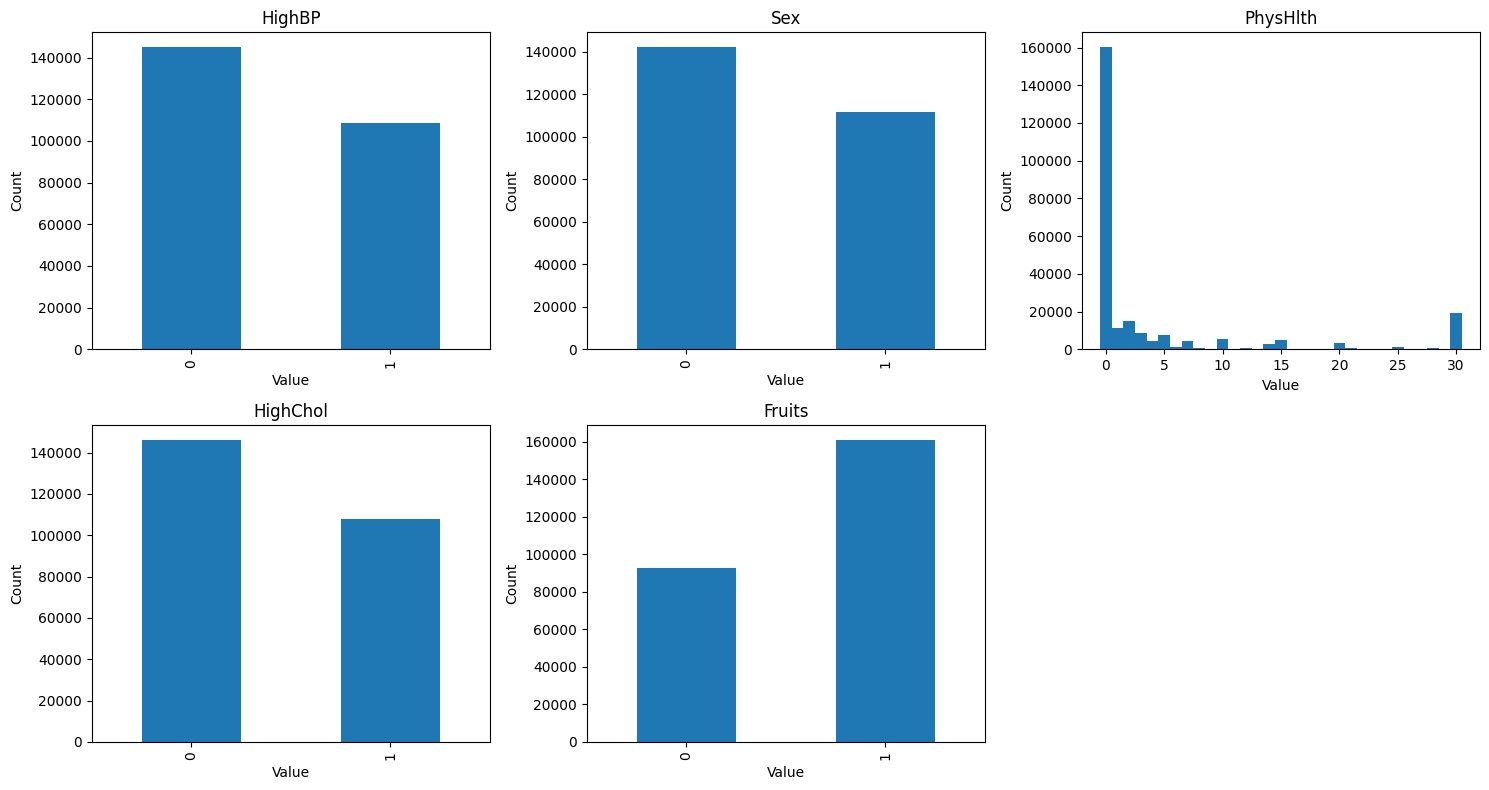

In [32]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(random_features, 1):
    plt.subplot(2, 3, i)

    unique_values = X[col].nunique()

    if unique_values <= 2:
        X[col].value_counts().sort_index().plot(kind="bar")
        plt.xlabel("Value")
        plt.ylabel("Count")
    else:
        bins = np.arange(X[col].min(), X[col].max() + 2) - 0.5
        plt.hist(X[col], bins=bins)
        plt.xlabel("Value")
        plt.ylabel("Count")

    plt.title(col)

plt.tight_layout()
plt.show()

### Correlation analysis

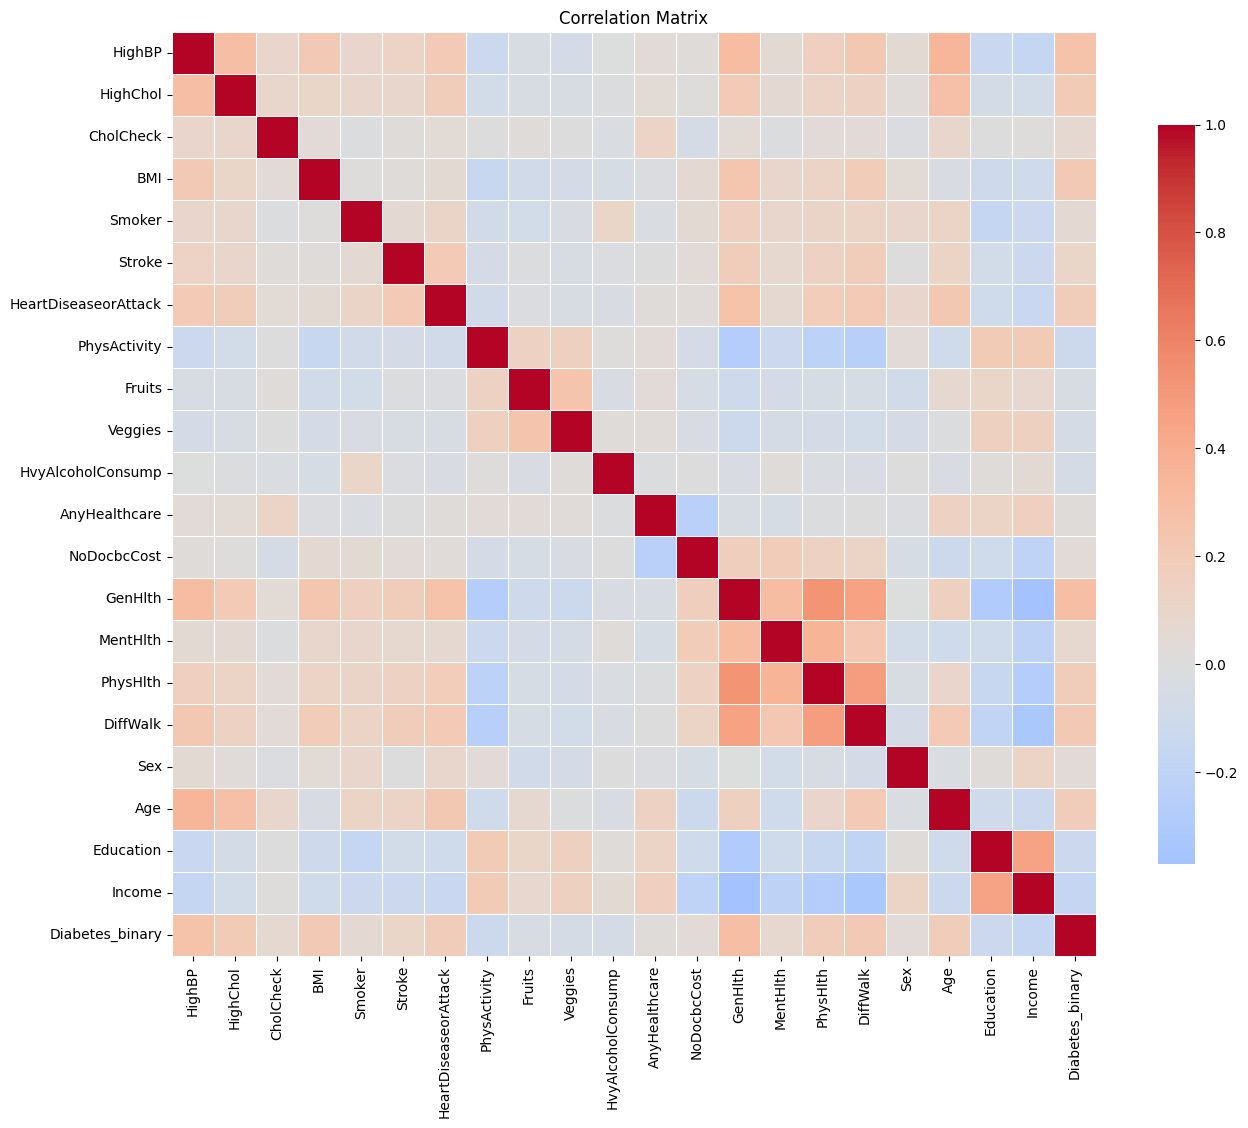

In [37]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix")
plt.show()

## Target exploration

In [11]:
y.describe()

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Target variable distribution

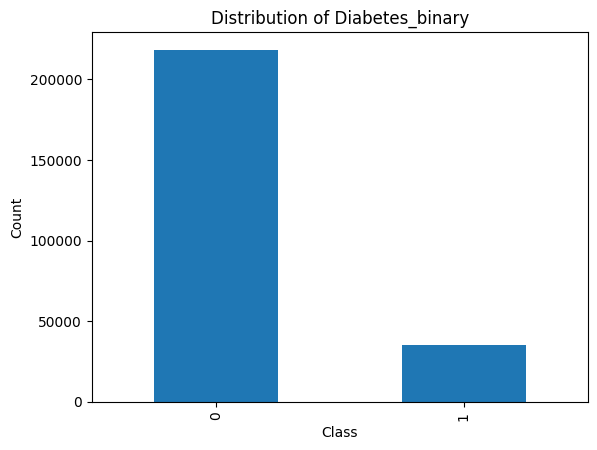

In [39]:
df["Diabetes_binary"].value_counts().plot(kind="bar")
plt.title("Distribution of Diabetes_binary")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Correlation with target variable

In [38]:
target_correlations = correlation_matrix["Diabetes_binary"].sort_values(ascending=False)
print("Correlation with Diabetes_binary:")
print(target_correlations)

Correlation with Diabetes_binary:
Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)